<a href="https://colab.research.google.com/github/lav162329/product-category-classifier/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 Project Overview: E-Commerce Product Category Classifier

Autor: Vojce Lazic

### Business Context

This project addresses a critical challenge in high-volume e-commerce operations: the slow, resource-intensive, and error-prone process of manually categorizing thousands of new products introduced daily. Accurate and swift classification is essential for efficient inventory management, product discoverability, and improving the overall customer experience on the platform.

---

### 📥 Initialization and Data Loading

This cell imports all the necessary Python libraries and loads products.csv, taking into account the path within the `data/ folder` and Clean up column names by stripping leading/trailing whitespace

In [2]:
# Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset from GitHub
url = "https://raw.githubusercontent.com/lav162329/product-category-classifier/main/data/products.csv"
df = pd.read_csv(url)

print(f"DataFrame loaded. Shape: {df.shape}")

# Clean up column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()
print("\nCleaned Column Names:\n", df.columns.tolist())

# Display initial data check
print("\n--- Initial Data Preview (First 5 Rows) ---")
print(df[['Product Title', 'Category Label', 'Number_of_Views', 'Merchant Rating']].head())
print("\nData Types:")
print(df.dtypes)

DataFrame loaded. Shape: (35311, 8)

Cleaned Column Names:
 ['product ID', 'Product Title', 'Merchant ID', 'Category Label', '_Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date']

--- Initial Data Preview (First 5 Rows) ---
                                       Product Title Category Label  \
0                    apple iphone 8 plus 64gb silver  Mobile Phones   
1                apple iphone 8 plus 64 gb spacegrau  Mobile Phones   
2  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...  Mobile Phones   
3                apple iphone 8 plus 64gb space grey  Mobile Phones   
4  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...  Mobile Phones   

   Number_of_Views  Merchant Rating  
0            860.0              2.5  
1           3772.0              4.8  
2           3092.0              3.9  
3            466.0              3.4  
4           4426.0              1.6  

Data Types:
product ID           int64
Product Title       object
Merchant ID          int64
Category L

## 🪄 Exploratory Data Analysis (EDA) and Preprocessing

This cell performs initial data quality checks, cleansing, and target variable analysis:

1.  **Missing Values Check:** Identifies any null (NaN) values across all columns.
2.  **Critical Row Removal:** Drops rows where the essential inputs (`Product Title`) or output (`Category Label`) are missing, ensuring a clean dataset for training.
3.  **Text Standardization:** Converts all `Product Title` entries to **lowercase**. This is a fundamental step to ensure consistency (e.g., 'IPHONE' is treated the same as 'iphone').
4.  **Class Balance Analysis:** Calculates the total number of unique categories and displays the top 10 most frequent categories (`value_counts()`).
5.  **Visualization:** Generates a **Bar Plot** of the Top 10 categories to visually confirm class distribution and identify potential class imbalance, guiding the selection of robust evaluation metrics (like F1-score).

---


--- Checking for Missing Values (NaN) ---
product ID           0
Product Title      172
Merchant ID          0
Category Label      44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
Listing Date        59
dtype: int64

Rows with NaN in key columns removed. New Shape: (35096, 8)

'Product Title' standardized to lowercase.

--- Target Variable Analysis: Class Balance ---
Total Unique Categories: 13

Top 10 Categories:
Category Label
Fridge Freezers     5470
Washing Machines    4015
Mobile Phones       4002
CPUs                3747
TVs                 3541
Fridges             3436
Dishwashers         3405
Digital Cameras     2689
Microwaves          2328
Freezers            2201
Name: count, dtype: int64


/tmp/ipython-input-865055167.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.nlargest(10).index, y=category_counts.nlargest(10).values, palette='viridis')


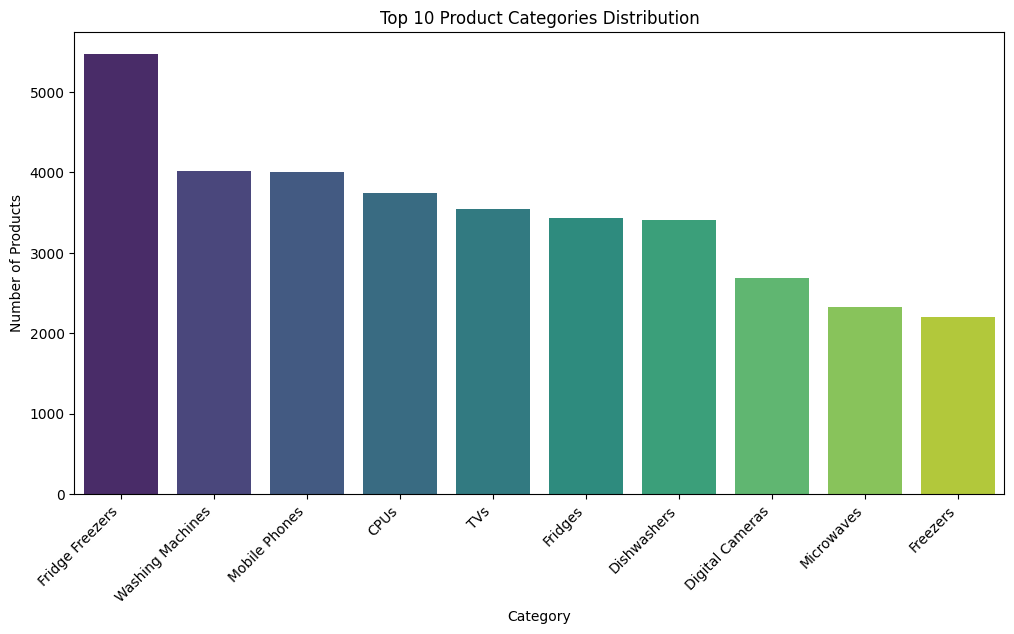

In [3]:
# EDA and Data Cleaning

# Check for Missing Values
print("\n--- Checking for Missing Values (NaN) ---")
print(df.isnull().sum())

# Data Cleaning Action: Remove rows where key columns are missing
# The 'Product Title' and 'Category Label' are mandatory for this task.
df.dropna(subset=['Product Title', 'Category Label'], inplace=True)
df.reset_index(drop=True, inplace=True)

print(f"\nRows with NaN in key columns removed. New Shape: {df.shape}")

# Text Standardization: Convert titles to lowercase
df['Product Title'] = df['Product Title'].astype(str).str.lower()
print("\n'Product Title' standardized to lowercase.")

# Target Variable Exploration: Class Balance
print("\n--- Target Variable Analysis: Class Balance ---")
category_counts = df['Category Label'].value_counts()
print(f"Total Unique Categories: {len(category_counts)}")
print("\nTop 10 Categories:")
print(category_counts.head(10))

# Visualization of Top 10 Categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.nlargest(10).index, y=category_counts.nlargest(10).values, palette='viridis')
plt.title('Top 10 Product Categories Distribution')
plt.ylabel('Number of Products')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.show()

# EDA Note: The visualization will clearly show the class imbalance, which is typical for e-commerce data.